# Objetivo do Projeto

Este é um projeto que utiliza redes neurais convolucionais para realizar previsões de temperatura à partir de do conjunto de dados [Minimum Daily Temperatures Dataset (datasets em Machine Learning Mastery)](https://machinelearningmastery.com/time-series-datasets-for-machine-learning/).

O principal intuito é entender um pouco de como podemos utilizar as redes neurais convolucionais para previsão de séries temporais.

Além disso, estudamos a técnica de bootstrap para estimar intervalos de predição e qual é o nível de confiança deste intervalo.

# Importação de bibliotecas e dados

## Importando principais bibliotecas para o estudo

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# Importando dados
dataset = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')
dataset.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


## Verificando os dados

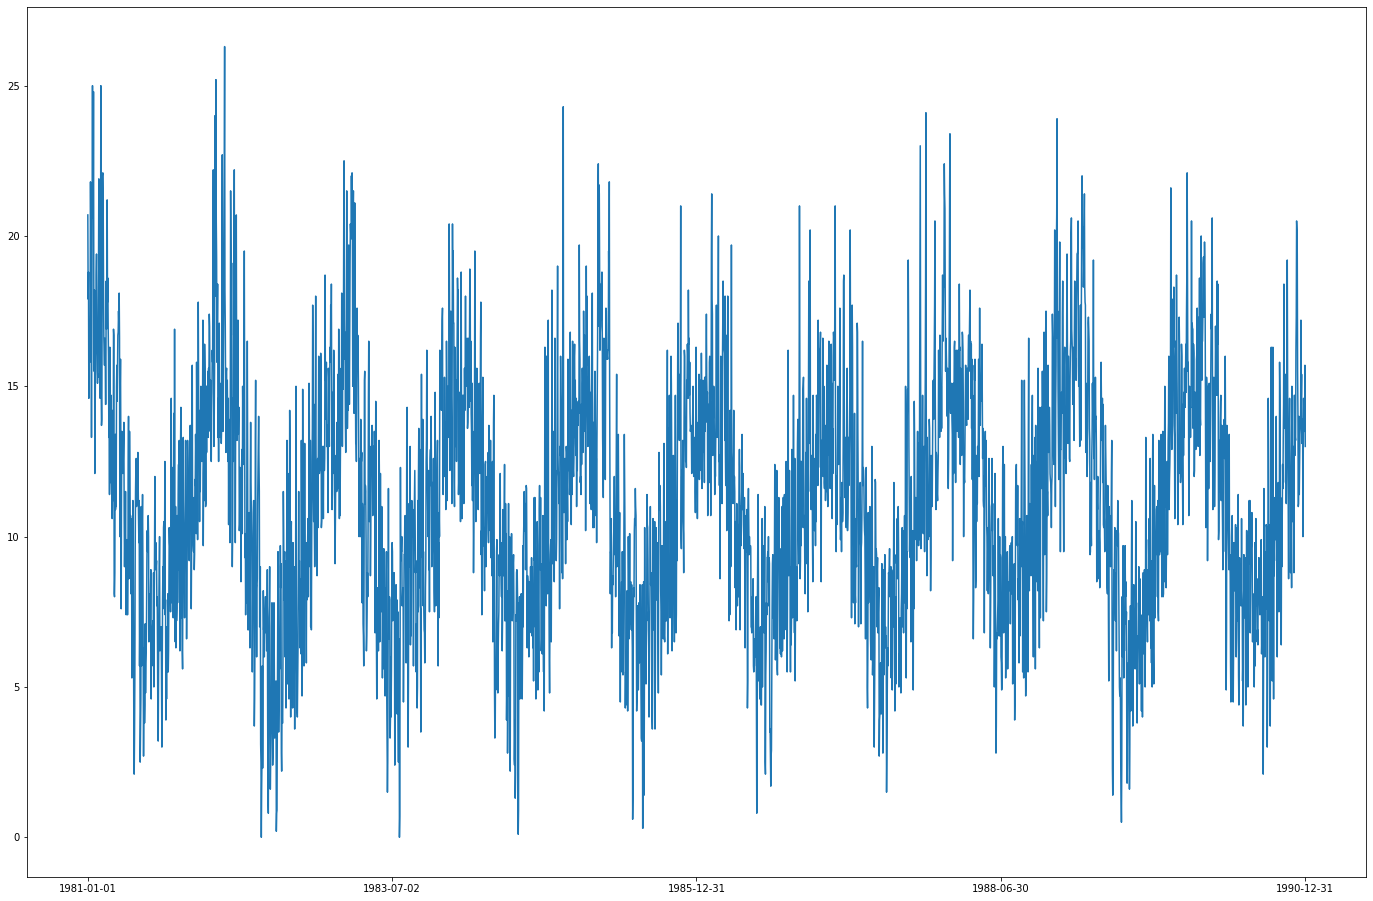

In [3]:
# Plotando dados
fig = plt.figure(figsize=(24,16))

n_examples = len(dataset)

plt.plot(dataset['Date'],dataset['Temp'])

ax = plt.gca()

# Formatando as datas
index = np.linspace(0,n_examples-1,5,dtype='uint16')
ax.set_xticks(dataset['Date'].iloc[index])

plt.show()

## Redes Convolucionais para Séries Temporais

Os modelos de Redes Neurais Convolucionais são um tipo de redes neurais bastante interessante para dados de entrada com relação temporal ou espacial, por exemplo imagens e séries temporais.

Esta rede neural tem vantagem, em geral, possuir menos pesos economizando memória. Além disso, por ser uma série de pequenos cálculos podemos utilizar uma placas gráfica que possui uma série de processadores  (GPU's) com capacidade menor, porém em maior quantidade, permitindo processar vários cálculos em paralelo, acelerando o processamento.

Para melhor compreensão recomendo conhecimentos teóricos sobre como funcionam as redes neurais convolucionais.

Para mais detalhes pode-se consultar as seguintes referências:

[Uma introdução as redes neurais convolucionais utilizando o Keras](https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-as-redes-neurais-convolucionais-utilizando-o-keras-41ee8dcc033e)

[Entendendo Redes Convolucionais (CNNs)](https://medium.com/neuronio-br/entendendo-redes-convolucionais-cnns-d10359f21184)

[A Comprehensive Guide to Convolutional Neural Networks — the ELI5 way](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

[Build an Image Classification Model using Convolutional Neural Networks in PyTorch](https://www.analyticsvidhya.com/blog/2019/10/building-image-classification-models-cnn-pytorch/)


Para o nosso propósito o funcionamento das redes neurais convolucionais para imagens será praticamente o mesmo, só mudando as dimensões dos conjuntos de dados.

A rede neural utilizada tem a seguinte arquitetura:


  Camada 1: 

    (0): Conv1d(in_channels = 1, out_channels = 2, kernel_size=(5,), stride=(1,))

    (1): BatchNorm1d(num_features = 2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

    (2): GELU()

    (3): Dropout(p=0.25, inplace=False)

    (4): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))


  Camada 2: 
  
    (0): Conv1d(in_channels = 2, out_channels = 4, kernel_size=(5,), stride=(1,))

    (1): BatchNorm1d(num_features = 4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

    (2): GELU()

    (3): Dropout(p=0.25, inplace=False)

    (4): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
    
    
  Camada 3: 

    (0): Conv1d(in_channels = 4, out_channels = 4, kernel_size=(5,), stride=(1,))

    (1): BatchNorm1d(num_features = 4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

    (2): GELU()

    (3): Dropout(p=0.25, inplace=False)

    (4): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
    
    
  Camada 4: 

    (0): Conv1d(in_channels = 4, out_channels = 8, kernel_size=(3,), stride=(1,))

    (1): BatchNorm1d(num_features = 8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

    (2): GELU()

    (3): Dropout(p=0.25, inplace=False)

    (4): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
    
    
  Camada Saída: 

    Linear(in_features=160, out_features=1, bias=True)

### Explicando decisões
Neste caso temos a seguinte ordem em cada camada:

* Convolução: Em cada entrada escolhemos aplicar a convolução primeiramente, para mesclar os dados antes de passar por filtros, assim como nas redes feedforward.

* Batch Normalization: Esta técnica servirá para facilitar o treinamento, que em geral permite uma convergência mais rápida dos parâmetros, pois normaliza a escala de cada convolução, deixando-as mais estáveis e menos propensas à problemas de redes neurais profundas. Com isso também permite uma *learning rate* maior e assim também contribuindo para um treinamento mais rápido.

* GELU: É comum utilizar a função de ativação RELU em redes neurais profundas, porém problemas de gradiente que levam à estagnação ou ao treinamento mais lento preferi utilizar a função de ativação GELU. Outras funções de ativação com o mesmo aspecto também são interessantes, como a SiLU.

* Dropout: O dropout é uma regularização, onde definimos uma probabilidade de cada uma das saídas da ativação ser anulada. Esta técnica permite que a rede treine de forma mais uniforme os parâmetros da camada.

* AvgPool: A average pooling é um filtro que realiza a média em pequenos blocos da saída da camada. Assim transformamos uma grande janela de saída da ativação em janelas menores.

### Otimizador

Para otimizar os parâmetros foi utilizado o otimizador Adam, um modelo que combina diversas técnicas de outros otimizadores. Em geral este otimizador tem uma convergência rápida. 

Porém nem sempre desejamos que o otimizador encontre um minimizador, que pode resultar em *overfitting*. Nesse caso outros otimizadores mais lentos podem ter resultados melhores. Para uma análise mais completa devemos testar diversos otimizadores e hiperparâmetros, mas eventualmente isso pode demorar muito e não ser viável, dependendo do tamanho da rede neural.

Então a inicialização do otimizador utilizada foi a seguinte:

    Adam(model.parameters(), lr=learning_rate,weight_decay=1e-5)

Nesse caso ``model.parameters()`` são os parâmetros do modelo, ``lr`` é a *learning rate* que no nosso caso foi de 0.1 e ``weight_decay`` é o parâmetro da penalidade $ℓ_{2}$ sobre os pesos.

## Transformação dos dados

Primeiramente aplicamos as tranformações de escala ``MinMaxScaler``, treinado com os dados de treino e em seguida aplicamos as transformações de escala para o conjunto de dados inteiro.

Para aplicar os modelos precisamos primeiramente transformar um ``numpy.array`` em ``torch.Tensor``. 

Em seguida, precisamos transformar os dados em janelas da série temporal. Mais precisamente, supondo que vamos utilizar uma janela com 5 observações então utilizaremos as 5 observações anteriores para prever o valor. 

Nesse caso teremos que transformar dados da forma de série temporal dado por ``(num_exemplos,1)`` e transformar na forma ``(num_exemplos-tamanho_janela,1,tamanho_janela)`` onde a primeira dimensão corresponde aos exemplos, a segunda corresponde ao número de canais do tensor, que separa cada entrada/saída da convolução em canais diferentes, e a terceira dimensão corresponde à janela de observações.

In [4]:
# Pytorch e pré-processamento
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler



# Formatando os dados de temperatura
y = dataset['Temp']
y = y.astype(float)

y = pd.DataFrame(y)


# Tamanho da sequência utilizada em cada previsão
seq_length = 365



# Número de exemplos
m = len(y)

# A divisão treino e teste é 90%-10%
index = int((m-seq_length)*0.9)
train = y[:index].copy()
test = y[index:].copy()



# Mudança de escala para facilitar o treinamento
sc_y = MinMaxScaler(feature_range=(0,1))

# DataFrame Treino e Teste
train_set = pd.DataFrame(train)
test_set = pd.DataFrame(test)

# Mudança de escala de acordo com os dados de treino
train_sc = sc_y.fit_transform(train_set)
train_sc = pd.Series(train_sc[:,0],index=train_set.index)
test_sc = sc_y.transform(test_set)
test_sc = pd.Series(test_sc[:,0],index=test_set.index)



y_sc = sc_y.transform(y)

In [5]:
# Transformando em tensor
dados = torch.tensor(y_sc)
dados = dados.squeeze(-1)
dados = dados.type(torch.float) 

# Definindo a janela de dados
def Window(data, length_windows):
    # Número de exemplos
    length_data = data.shape[0]
    # Definindo os dados de entrada e as respostas correspondentes
    data_x = torch.zeros(length_data - length_windows, length_windows)
    data_y =  torch.zeros(length_data - length_windows)
    # Adicionando as janelas de dados
    for i in range(length_windows):
        data_x[:,i] = data[i:length_data - length_windows  + i]
    # Definindo as respostas
    data_y = data[length_windows:]
    # Rearanjando as dimensões para aplicar a convolução
    data_y = data_y.unsqueeze(-1)
    data_x = data_x.unsqueeze(1)
    return data_x, data_y

# Número de exemplos
m = len(dados) - seq_length
# Divisão treino-teste de 90%-10%
train_size = int(m * 0.9)
test_size = len(dados) - seq_length - train_size

# Definindo os dados
data_X, data_y = Window(dados, seq_length)
data_y.shape
data_X.shape

torch.Size([3285, 1, 365])

In [6]:
# Divisão Treino-Teste
trainX, trainY  = data_X[:train_size],data_y[:train_size]
testX, testY = data_X[train_size:],data_y[train_size:]

In [7]:
# Barra de progresso
from tqdm import tqdm

# Verificando se é possível utilizar a GPU
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

# Entrando com os parâmetros de entrada, retorna o valor de saída de cada camada
def output_size(sequence_length,kernel_size,stride,padding):
  conv_size = int((sequence_length-kernel_size+2*padding)/(stride)) + 1
  pooling_size = int((conv_size)/2)
  return pooling_size


    

class Time_Series(nn.Module):
    def __init__(self,seq_length):
        super(Time_Series, self).__init__()
        # Parâmetros de cada camada
        # Tamanhos de Kernel
        self.conv_kernel_sz = [5,5,5,3]
        # Número de canais (segunda dimensão)
        self.num_channels_out = [2,4,4,8]
        # Padding
        self.padding = [0,0,0,0]
        # Stride
        self.stride = [1,1,1,1]

        # Tamanho da janela de observações
        self.seq_length = seq_length

        # Número de camadas
        n_layers = len(self.conv_kernel_sz)

        # Encontrando o valor de saída de cada camada
        output_size_ConvNet = seq_length
        for i in range(n_layers):
            output_size_ConvNet=output_size(output_size_ConvNet,
                                          kernel_size=self.conv_kernel_sz[i],
                                          stride=self.stride[i],
                                          padding=self.padding[i])
            print('Camada %d: %d'%((i+1),output_size_ConvNet))
        # Tamanho da última convolução
        self.output_size_ConvNet = output_size_ConvNet
        

        
        # Camada 1
        self.layer1 =  nn.Sequential(
                        nn.Conv1d(in_channels=1,out_channels=self.num_channels_out[0],kernel_size=self.conv_kernel_sz[0],padding=self.padding[0],stride=self.stride[0],groups=1),
                        nn.BatchNorm1d(self.num_channels_out[0]),
                        nn.GELU(),
                        nn.Dropout(0.25),
                        nn.AvgPool1d(2)
                        )

        # Camada 2
        self.layer2 =  nn.Sequential(
                        nn.Conv1d(in_channels=self.num_channels_out[0],out_channels=self.num_channels_out[1],kernel_size=self.conv_kernel_sz[1],padding=self.padding[1],stride=self.stride[1],groups=1),
                        nn.BatchNorm1d(self.num_channels_out[1]),
                        nn.GELU(),
                        nn.Dropout(0.25),
                        nn.AvgPool1d(2)
                        )

        # Camada 3
        self.layer3 =  nn.Sequential(nn.Conv1d(in_channels=self.num_channels_out[1],out_channels=self.num_channels_out[2],kernel_size=self.conv_kernel_sz[2],padding=self.padding[2],stride=self.stride[2],groups=1),
                        nn.BatchNorm1d(self.num_channels_out[2]),
                        nn.GELU(),
                        nn.Dropout(0.25),
                        nn.AvgPool1d(2))

        # Camada 4
        self.layer4 =  nn.Sequential(
                        nn.Conv1d(in_channels=self.num_channels_out[2],out_channels=self.num_channels_out[3],kernel_size=self.conv_kernel_sz[3],padding=self.padding[3],stride=self.stride[3],groups=1),
                        nn.BatchNorm1d(self.num_channels_out[3]),
                        nn.GELU(),
                        nn.Dropout(0.25),
                        nn.AvgPool1d(2)
                        )
        




        # Camada Saída
        self.fc = nn.Linear(self.output_size_ConvNet*self.num_channels_out[-1], 1)

    def forward(self, x):

        # Camada 1
        out = self.layer1(x)
        # Camada 2
        out = self.layer2(out)
        # Camada 3
        out = self.layer3(out)
        # Camada 4
        out = self.layer4(out)
        # Transforma redimensiona as duas últimas dimensões em uma só
        out = out.view(-1,self.output_size_ConvNet*self.num_channels_out[-1])
        # Combina as saídas linearmente
        out = self.fc(out)
        return out 

In [8]:
# Treina a rede neural
def train(model, optimizer, loss_f, num_epochs, batch_size, data_train_x, data_train_y):
    # Lista de valores da loss function no treino
    list_loss = []


        
    # Conta o número de iterações    
    j = 0
    # Numero de exemplos
    m = len(data_train_y)
    # Número de batches
    num_batches = m//batch_size + 1 if m%batch_size>0 else m//batch_size

    # Número total de iterações
    num_iterations = num_batches*num_epochs

    # Selecionando aleatoriamente os dados
    idx = torch.randperm(m)
    idx = idx[:batch_size]

    # Parâmetro de suavização dos valores da loss function
    alpha = .9
    # Suavização dos valores de treino
    exponential_decay_loss = []

    # Avaliando o erro
    model.eval()
    loss = loss_f(model(data_train_x[idx]),data_train_y[idx])

    # Modo de treinamento
    model.train()

    # Suavização dos valores de treino
    exponential_decay_loss.append(loss.item())
    for epoch in tqdm(range(num_epochs)):
      for i in range(num_batches):
            # Escolhendo aleatoriamente os dados de treino
            idx = torch.randperm(m)
            idx = idx[:batch_size]


            X_batch = data_train_x[idx]
            y_batch = data_train_y[idx]


            # Avaliando a função
            outputs = model(X_batch)
            # Avaliando erro
            loss = loss_f(outputs, y_batch)

            # Zerando o gradiente do otimizador
            optimizer.zero_grad()
            # Realiza a backpropagation à partir do grafo do modelo (arquitetura)
            loss.backward()

            # Realiza o passo
            optimizer.step()

            # Adiciona à lista de loss function
            list_loss.append(loss.item())
            # Aplica suavização à loss function
            exponential_decay_loss.append(alpha*exponential_decay_loss[-1] + (1-alpha)*list_loss[-1])

            # Mostra as estatísticas do treinamento periodicamente
            if j % 50*num_batches == 0:
                print("\nIteration: [%d/%d], Exponentially Smoothed Train Loss: %1.4E" % (j,num_iterations, exponential_decay_loss[-1]))
            j += 1
    
    print('Finished Training Trainset')
    
    # Plota os valores da loss function
    fig=plt.figure(figsize=(12,8))

    ax=fig.add_axes([.1,.1,.85,.85])

    ax.plot(list_loss,c='#0F5CFE',label='Train Loss')
    ax.plot(exponential_decay_loss,c='#6C1AD9',label='Exponentially Smoothed Train Loss')
    ax.set_yscale('log')
    plt.legend()
    plt.show()
    # Valores finais de loss function
    print('Train Loss: %1.4E'% list_loss[-1])
    print('Smoothed Loss: %1.4E'% exponential_decay_loss[-1])
    return [exponential_decay_loss,list_loss]

Batch Size: 497
Camada 1: 180
Camada 2: 88
Camada 3: 42
Camada 4: 20


  0%|          | 0/101 [00:00<?, ?it/s]


Iteration: [0/606], Exponentially Smoothed Train Loss: 1.9671E-01


  9%|▉         | 9/101 [00:02<00:22,  4.12it/s]


Iteration: [50/606], Exponentially Smoothed Train Loss: 7.7658E-02


 17%|█▋        | 17/101 [00:04<00:20,  4.11it/s]


Iteration: [100/606], Exponentially Smoothed Train Loss: 1.7879E-02


 26%|██▌       | 26/101 [00:06<00:18,  4.03it/s]


Iteration: [150/606], Exponentially Smoothed Train Loss: 1.5743E-02


 34%|███▎      | 34/101 [00:08<00:16,  4.19it/s]


Iteration: [200/606], Exponentially Smoothed Train Loss: 1.4667E-02


 42%|████▏     | 42/101 [00:10<00:14,  3.95it/s]


Iteration: [250/606], Exponentially Smoothed Train Loss: 1.4429E-02


 50%|█████     | 51/101 [00:12<00:12,  4.12it/s]


Iteration: [300/606], Exponentially Smoothed Train Loss: 1.3279E-02


 58%|█████▊    | 59/101 [00:14<00:11,  3.81it/s]


Iteration: [350/606], Exponentially Smoothed Train Loss: 1.3577E-02


 66%|██████▋   | 67/101 [00:16<00:09,  3.58it/s]


Iteration: [400/606], Exponentially Smoothed Train Loss: 1.3190E-02


 74%|███████▍  | 75/101 [00:18<00:06,  4.17it/s]


Iteration: [450/606], Exponentially Smoothed Train Loss: 1.2892E-02


 83%|████████▎ | 84/101 [00:21<00:05,  3.30it/s]


Iteration: [500/606], Exponentially Smoothed Train Loss: 1.2897E-02


 91%|█████████ | 92/101 [00:23<00:02,  3.94it/s]


Iteration: [550/606], Exponentially Smoothed Train Loss: 1.2144E-02


 99%|█████████▉| 100/101 [00:25<00:00,  4.13it/s]


Iteration: [600/606], Exponentially Smoothed Train Loss: 1.2493E-02


100%|██████████| 101/101 [00:25<00:00,  3.95it/s]


Finished Training Trainset


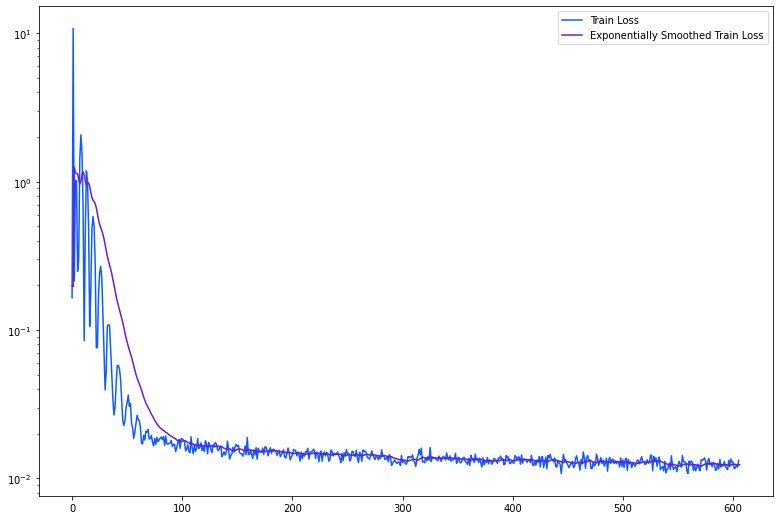

Train Loss: 1.3219E-02
Smoothed Loss: 1.2392E-02


In [9]:
# Tamanho dos batches
batch_size = len(trainX)//6+5
print('Batch Size: %d'%batch_size)


# Inicializando o modelo
model = Time_Series(seq_length)


# Mean Square Error como loss function
loss_function = torch.nn.MSELoss()

# Hiperparametros
learning_rate = 1e-1
# Numero de épocas
num_epochs = 101

# Otimizador
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=1e-5)

# Treinando rede neural
[exponential_decay_loss,list_loss] = train(model, optimizer, loss_function, num_epochs, batch_size, trainX, trainY)

In [10]:
# Salva o modelo
torch.save(model.state_dict(),'convolutional_forecast.pt')

## Avaliando os resultados

Lembre-se que os dados de treino estavam em escala dada pelo objeto ``sc_y``. Portanto após previsão previsamos reverter à escala original.

In [11]:
# Métricas de avaliação de erros
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error



# Previsão
prediction = model(data_X)

# Previsão (em escala) para a Série inteira em numpy.array
data_predict_sc = prediction.data.numpy()
# Dados (em escala) para plotar
dataY_plot_sc = data_y.data.numpy()

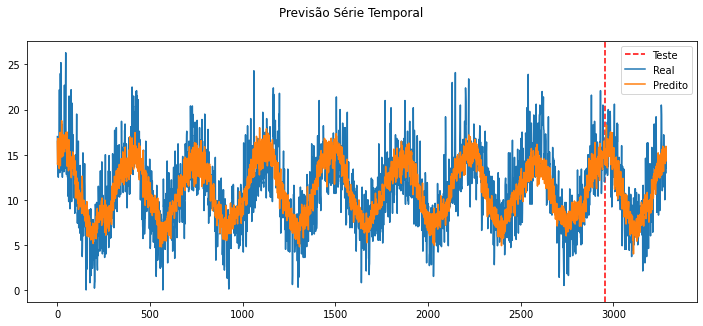

MSE: 7.1627
RMSE: 2.6763
MAE: 2.0857


In [12]:
n = len(dataY_plot_sc)




# Revertendo para a escala original
dataY_plot = sc_y.inverse_transform(dataY_plot_sc)
data_predict = sc_y.inverse_transform(data_predict_sc)

# Avaliando o erro nos dados de teste
MSE = mean_squared_error(dataY_plot[train_size:],data_predict[train_size:])
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(dataY_plot[train_size:],data_predict[train_size:])
MAPE = mean_absolute_percentage_error(dataY_plot[train_size:],data_predict[train_size:])




# Plotando os resultados
size = 12
fig = plt.figure(figsize=(size,0.4*size))
plt.axvline(x=train_size, c='r', linestyle='--')
plt.plot(dataY_plot)
plt.plot(data_predict)
plt.legend(["Teste","Real","Predito","Limite Inferior","Limite Superior"])
plt.suptitle('Previsão Série Temporal')
fig.savefig('figures/test.pdf', bbox_inches='tight')
plt.show()

print('MSE: %1.4f'%MSE)
print('RMSE: %1.4f'%RMSE)
print('MAE: %1.4f'%MAE)

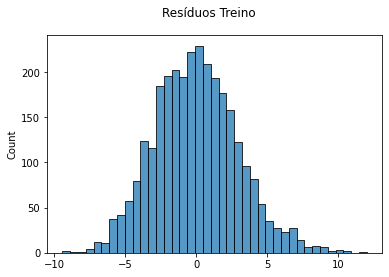

In [13]:
# Verificando os resíduos dos dados de treino
residual = (dataY_plot[:train_size] - data_predict[:train_size]).ravel()

# Plotando os resíduos
sns.histplot(residual)
plt.suptitle('Resíduos Treino')
fig = plt.gcf()
fig.savefig('figures/residual.pdf', bbox_inches='tight')
plt.show()

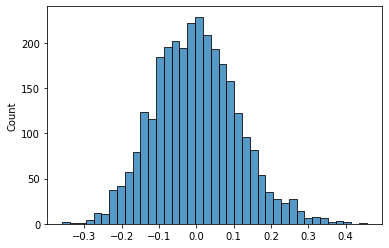

In [14]:
# Resíduos na escala de sc_y
# Cuidado para não aplicar sc_y.transform(residual)
residual_sc = residual*sc_y.scale_
sns.histplot(residual_sc)
plt.show()

# Bootstrap Resíduos - Intervalo de Previsão

As redes neurais por possuírem muitos parâmetros, relacionados de maneira não linear, o tratamento estatístico destes parâmetros fica comprometido. Portanto nesse caso os intervalos de previsão se tornam muito complexos para estimar à partir dos parâmetros do modelo.

Portanto outras técnicas devem ser utilizadas. Uma técnica bastante utilizada é a bootstrap, que é basicamente uma forma de sintetizar dados novos e/ou rearrajar à partir dos erros anteriores nos dados de treino e/ou teste.

Em cada simulação iremos utilizar uma previsão do tipo ``pred + res``, onde ``pred`` é a previsão do modelo e ``res`` é um resíduo escolhido aleatoriamente dos dados de treino. Há outras técnicas de bootstrap para simular os dados, mas iremos adotar essa por simplicidade.

## Intervalo de Previsão - Quartis

Neste caso utilizamos os quartis 2.5% e 97.5% das 200 simulações para realizar o intervalo de previsão.

In [15]:
n_sims = 200

bootstrap_window = 30//2

simulations = np.zeros((test_size,n_sims))
# torch.no_grad evita o uso desnecessario de memória
with torch.no_grad():
  for j in tqdm(range(n_sims)):
      # Última amostra dos dados de treino
      # para prever os dados de teste
      last_sample = trainX[-1:].clone()
      for i in tqdm(range(test_size), leave=False):
          # Previsão
          last_prediction = model(last_sample)
          

          # Utilizando a previsão + resíduo na simulação
          pred = last_prediction.item()
          res = np.random.choice(residual_sc)
          simulations[i,j] = pred + res
          
          # Atualizando janela com previsão + resíduo
          last_sample[:,:,:-1] = last_sample[:,:,1:].clone()
          last_sample[:,:,-1:] = (last_prediction + res).clone()

100%|██████████| 200/200 [01:30<00:00,  2.22it/s]


Para prever os dados intervalos de previsão utilizaremos os quartis 2.5% e 97.5% dos dados simulados. Estes serão respectivamente o limite inferior e limite superior do intervalo de previsão de cada um dos elementos dos dados de teste.

In [16]:
# Convolutional Smoothing
def smoothing_curve(y,box_pts):
    y_smooth = np.concatenate((np.repeat(y[:1],repeats=box_pts,axis=0),y,np.repeat(y[-1:],repeats=box_pts,axis=0)))
    y_smooth = y_smooth.ravel()
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y_smooth,box,mode='same')
    y_smooth = y_smooth[box_pts:-box_pts]
    y_smooth = np.expand_dims(y_smooth,1)
    return y_smooth

In [17]:
# Quartil 2.5%
q = 2.5/100
# Limites inferior e superior do intervalo
lower_sc = np.quantile(simulations,q,axis=1,keepdims=True)
upper_sc = np.quantile(simulations,1-q,axis=1,keepdims=True)
# Mediana das simulações
prediction_sc = np.median(simulations,axis=1,keepdims=True)




# Smoothing curves
box_pts = 20
lower_sc = smoothing_curve(lower_sc,box_pts)
upper_sc = smoothing_curve(upper_sc,box_pts)
prediction_sc = smoothing_curve(prediction_sc,box_pts)

# Limites inferior e superior do intervalo (na escala original)
upper = sc_y.inverse_transform(upper_sc)
lower = sc_y.inverse_transform(lower_sc)
# Mediana das simulações (na escala original)
prediction = sc_y.inverse_transform(prediction_sc)

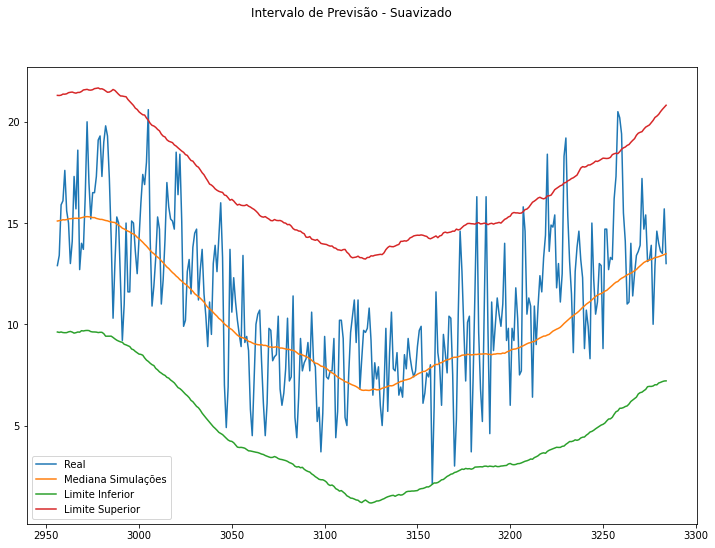

In [18]:
# Plotando os dados de treino, teste e intervalos de previsão
size = 12
fig = plt.figure(figsize=(size,0.7*size))
test_index = list(range(train_size,m))
plt.plot(test_index,dataY_plot[test_index])
plt.plot(test_index,prediction)
plt.plot(test_index,lower)
plt.plot(test_index,upper)
plt.legend(["Real","Mediana Simulações","Limite Inferior","Limite Superior"])
plt.suptitle('Intervalo de Previsão - Suavizado')
fig.savefig('figures/confidence_int.pdf', bbox_inches='tight')
plt.show()

## Intervalo de Confiança

Aqui estamos estimando o intervalo de confiança de 95% da previsão estar no intervalo de previsão estipulado nos dados de teste.

Vamos supor que $Y_{i}$ é uma variável aleatória, onde $Y_{i} = 1$ se o valor real está no intervalo de previsão e $Y_{i} = 0$ caso contrário, para cada $i$ no conjunto de teste, então iremos supor que $Y_{i}$ tem uma distribuição Bernoulli com probabilidade de sucesso $p$.

A estimativa através da máxima verossimilhança (Maximum Likelihood) é dada por $\hat{p} = \frac{1}{n_{\text{Teste}}} \sum_{i\in S_{\text{Teste}}} Y_{i}$, onde $n_{\text{Teste}}$ é o número de elementos do conjunto de teste e $S_{\text{Teste}}$ são os índices do conjunto de teste.

Além disso, pela teoria da Máxima Verossimilhança temos que $\hat{p}$ tem distribuição aproximadamente normal com média $p$ e variância de aproximadamente $\frac{p(1-p)}{n_{\text{Teste}}}$. 

Iremos então utilizar a distribuição $t$ para estimar o intervalo de confiança desta de $p$.

Referência:
[Binomial confidence intervals and contingency tests: mathematical
fundamentals and the evaluation of alternative methods](https://www.ucl.ac.uk/english-usage/staff/sean/resources/binomialpoisson.pdf)

In [19]:
from scipy.stats import t

# Proporção dos dados de teste
p = (np.logical_and(dataY_plot[train_size:]<=upper,dataY_plot[train_size:]>=lower)).mean()

# Estimando o valor t para 95% de confiança, com duas caudas e test_size-1 graus de liberdade 
q = 2.5/100
t_value = t.ppf(1-q,test_size-1)

# Limite inferior e limite superior
p_upper = p + t_value*np.sqrt(p*(1-p)/(test_size-1))
p_lower = p - t_value*np.sqrt(p*(1-p)/(test_size-1))
print('Limites da probabilidade de sucesso: [%1.4f,%1.4f]'%(p_lower,p_upper))

Limites da probabilidade de sucesso: [0.9510,0.9883]


## Intervalo de Confiança - Wilson Score

Iremos então utilizar a uma técnica de inferência do intervalo de confiança proposta por Wilson. 

Referências:

[Edwin B. Wilson: Probable Inference, the Law of Succession, and Statistical Inference](https://www.tandfonline.com/doi/abs/10.1080/01621459.1927.10502953)

[Binomial confidence intervals and contingency tests: mathematical
fundamentals and the evaluation of alternative methods](https://www.ucl.ac.uk/english-usage/staff/sean/resources/binomialpoisson.pdf)

In [20]:
# Aplicando Wilson Score de forma iterativa
p_upper = np.max([0.5,p])
p_lower = np.min([0.5,p])

for i in range(200):
  p_upper = p + t_value*np.sqrt(p_upper*(1-p_upper)/(test_size-1))
  p_lower = p - t_value*np.sqrt(p_lower*(1-p_lower)/(test_size-1))
print('Limites da probabilidade de sucesso: [%1.4f,%1.4f]'%(p_lower,p_upper))

Limites da probabilidade de sucesso: [0.9448,0.9835]


Então neste caso a chance $p$ de um dado aleatória estar no intervalo de previsão está no intervalo ``[0.9448,0.9835]``, com ``95%`` de confiança.

## Previsões e Intervalo de Previsão

Iremos realizar uma previsão e apresentar o intervalo de previsão da temperatura para 3 anos, a partir do dia do último dado.

In [21]:
# Previsão para os próximos 365 dias com intervalo de previsão
n_sims = 200
n_days = 365*3


# Previsão
prediction = np.zeros((n_days,1))

# Previsão similar à previsão anterior, porém sem resíduos
with torch.no_grad():
    last_sample = testX[-1:].clone()
    for i in tqdm(range(n_days), leave=False):
        last_prediction = model(last_sample)

        
        pred = last_prediction.item()
        prediction[i] = pred
        
        last_sample[:,:,:-1] = last_sample[:,:,1:].clone()
        last_sample[:,:,-1:] = (last_prediction).clone()

# Previsão na escala original
prediction = sc_y.inverse_transform(prediction)

# Simulações com resíduo para estimação dos intervalos de previsão
simulations = np.zeros((n_days,n_sims))

with torch.no_grad():
  for j in tqdm(range(n_sims)):
      last_sample = testX[-1:].clone()
      for i in tqdm(range(n_days), leave=False):
        last_prediction = model(last_sample)

        pred = last_prediction.item()
        res = np.random.choice(residual_sc)
        simulations[i,j] = pred + res


        last_sample[:,:,:-1] = last_sample[:,:,1:].clone()
        last_sample[:,:,-1:] = (last_prediction + res).clone()

100%|██████████| 200/200 [04:47<00:00,  1.44s/it]   


In [22]:
# Quartil 2.5%
q = 2.5/100
# Limites inferior e superior do intervalo
lower_sc = np.quantile(simulations,q,axis=1,keepdims=True)
upper_sc = np.quantile(simulations,1-q,axis=1,keepdims=True)

# Smoothing curves
box_pts = 20
lower_sc = smoothing_curve(lower_sc,box_pts)
upper_sc = smoothing_curve(upper_sc,box_pts)
prediction_smoothed = smoothing_curve(prediction,box_pts)

# Limites inferior e superior do intervalo (na escala original)
upper = sc_y.inverse_transform(upper_sc)
lower = sc_y.inverse_transform(lower_sc)


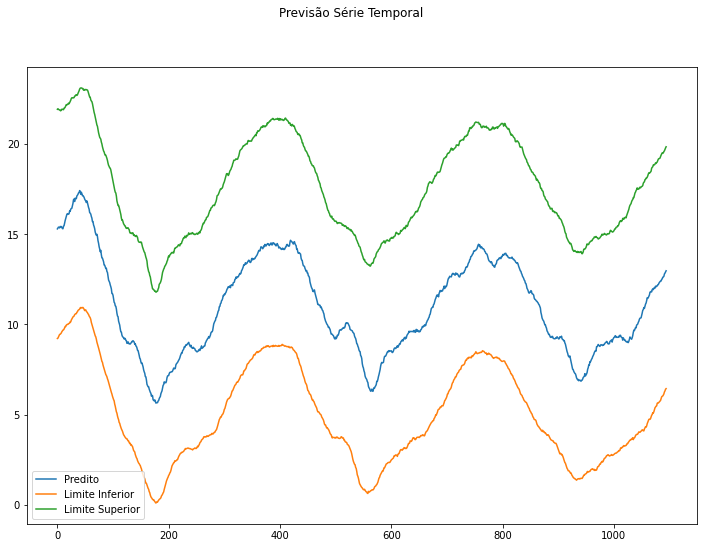

In [23]:

# Plotando os resultados
size = 12
fig = plt.figure(figsize=(size,0.7*size))
plt.plot(prediction_smoothed)
plt.plot(lower)
plt.plot(upper)
plt.legend(["Predito","Limite Inferior","Limite Superior"],loc=3)
plt.suptitle('Previsão Série Temporal')
fig.savefig('figures/Prediction.pdf', bbox_inches='tight')
plt.show()

# Conclusão

Neste projeto aprendemos a utilizar redes neurais convolucionais, com bons resultados na previsão desta série temporal.

Eventualmente um tipo de modelo mais simples poderia realizar previsões até melhores, porém utilizei as redes neurais para prova de conceito e também para explicar como podemos utilizar bootstrap para estimar intervalos de previsão.